# Introduction to Scikit-learn

### By **[NimbleBox](https://www.nimblebox.ai)**

<a href="https://www.nimblebox.ai"><img src="./assets/nbx.jpeg" alt="NimbleBox.ai logo" width="600"/></a>

This notebook contains parts from [Scikit-Learn](https://scikit-learn.org/stable).

## Things we will learn
 
We are going to see how to quickly and efficiently use the algorithms that we have studied till now. for that we are going to use [Scikit-learn](https://scikit-learn.org/stable/) which a python library in which we are going to see how to use:
 
1. Linear Regression
2. Logistic Regression
3. Support Vector Machines (SVM)
4. K-means Clustering
5. Naive Bayes
 
We are not going to show Decision trees as we already showed the scikit-learn implementation of that in the DecisionTrees and NaiveBayes Notebook.
 
The library has a host of other algorithms implemented that we won't be covering to keep things inline but do checkout scikit learn's documentation for that.


We import Scikit-learn by doing 
```python
import sklearn
```
Yes we don't import scikit_learn but sklearn, A thing to keep in mind.


Now let's start with our list of algorithms and we are going to demonstrate the basic usage of all of them that will mostly cover everything but if you encounter something that we didn't have mentioned, documentations are always great to refer to. 
 
To show these methods we are mostly going to use the data provided in in the scikit-learn library or fake data as the main purpose of this notebook is to introduce you to this library so you can quickly produce results without sitting to write models from scratch but then you ask then why were we writing algorithms from scratch, there are some of the things that i like to mention with that approach.
 
- No matter how clear the text, steps and mathematics are, implementation is always clearer.
- say if you want to use some other language and you don't have a machine learning library for that. Then you are not bound by it, you can still write the algorithm and use that. 
 
### Linear Regression


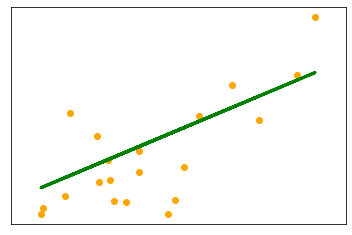

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

regression = linear_model.LinearRegression()

# Train the regression model
regression.fit(diabetes_X_train, diabetes_y_train)

# Make predictions
diabetes_y_pred = regression.predict(diabetes_X_test)

# Plot the linear line fitted by the model
plt.scatter(diabetes_X_test, diabetes_y_test,  color='orange')
plt.plot(diabetes_X_test, diabetes_y_pred, color='green', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression

In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Loading the iris dataset
X, y = load_iris(return_X_y=True)

log_reg = LogisticRegression(random_state=0, max_iter=130)

# Training the model
log_reg.fit(X, y)

print("Accuracy: "+ str(log_reg.score(X, y)))

Accuracy: 0.9733333333333334


### Support Vector Machines(Classification)
 
In this example we are going to use SVM from scikit-learn and also do some preprocessing which is just subtracting the data by the mean and dividing by standard deviation and create a pipeline so you don't need to pass the data to the the preprocessing step and then to SVM.


In [14]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Loading the iris dataset
X, y = load_iris(return_X_y=True)

# Creating the pipeline with first the prepocessing
# and then SVM
svm_pipeline = make_pipeline(StandardScaler(),
                    SVC(gamma='auto'))

# Training the model
svm_pipeline.fit(X, y)

print("Accuracy: "+ str(svm_pipeline.score(X, y)))

Accuracy: 0.9733333333333334


As we see both Support Vector Machines and logistic regression were able to do good on a simple dataset. but SVMs generally outperform logistic regression in some conditions because the type of problem the SVM tries to solve is always convex and therefore always reaches a global minima and doesn't get stuck in local minima. 


### K-means Clustering

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Initializing fake data
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# n_clusters is the number of clusters you want to 
# divide the data in
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Shows which data point was categorized into which cluster
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

### Naive Bayes

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


You can find out more about the use of these algorithms and a host of other algorithms in the Scikit-learn documentation page.
